#  ML Programming Assignment 1: Perceptron and AdaLine

Group Member: Mengjie Zhou, Yue Ma

Using the class example provided perceptron model to do the classification for the banknote
dataset. You can follow the class iris example, make plotting with selected features (can try with
various combinations of features) from the dataset and then choose features which affect the
classification most to make classification.

In [ ]:
import pandas as pd
df = pd.read_csv('C://Users//muzzl//Downloads//data_banknote_authentication.txt', header=None)
df.tail()

,0,1,2,3,4
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [ ]:
#F1:Variance of Wavelet Transformed image
#F2:Skewness of Wavelet Transformed image
#F3:Kurtosis of Wavelet Transformed image
#F4:Entropy of image
#Class: 0 for authentic, 1 for inauthentic.
df.columns = ['F1','F2','F3','F4', 'Class'] #rename the columns
x = df[['F1','F2', 'F3','F4']].values
y = df['Class']
df.tail()

,F1,F2,F3,F4,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [ ]:
x=df.iloc[:,[0,1,2,3]].values # we chose all the features
y=df.iloc[:,[4]].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
y_train=y_train.ravel()
y_test=y_test.ravel()
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test : ",x_test.shape)
print("y_test : ",y_test.shape)

x_train :  (1097, 4)
y_train :  (1097,)
x_test :  (275, 4)
y_test :  (275,)


In [ ]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.01,max_iter=15)
ppn.fit(x_train,y_train)
ppn_tested=ppn.predict(x_test)
ppn.score(x_test,y_test) 

#F1+F3==>0.8218181818181818
#F1+F4==>0.7927272727272727
#F2+F4==>0.5272727272727272
#F2+F3+F4==>0.7927272727272727
#F1+F2+F3==>0.96
#F1+F3+F4==>0.88
#F1+F2+F4==>0.7490909090909091
#....

0.9927272727272727

Using the class example provided adaline model to do the classification for the banknote dataset.
You can follow the class iris example, make plotting with selected features (can try with various
combinations of features) from the dataset and then choose features which affect the
classification most to make classification.

In [ ]:
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
       
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    

In [ ]:
ad=AdalineSGD(eta=0.0001,n_iter=15)
ad.fit(x_train,y_train)
ad_tested=ad.predict(x_test)

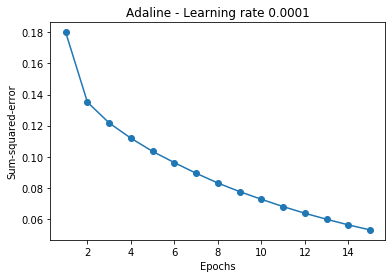

In [ ]:
plt.plot(range(1, len(ad.cost_) + 1), ad.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')

plt.show()

Please further compare the results between perceptron model and Adaline model.

In [ ]:
ppntested=ppn.predict(x_test)
ppnwrong=np.sum((ppntested-y_test)**2)
print("number of wrong predictions of sklearn Perceptron : ",ppnwrong)

number of wrong predictions through sklearn Perceptron :  2


In [ ]:
adtested=ad.predict(x_test)
adwrong=np.sum((adtested-y_test)**2)
print("number of wrong predictions of adaline SGD : ",adwrong)

number of wrong predictions through adaline SGD :  35
